#### **1. Import Libraries**

In [14]:
#load datasets
!pip install python-mnist

In [15]:
from mnist import MNIST
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **2. Load Dataset**

In [16]:
mndata = MNIST('/content/drive/MyDrive/Colab Notebooks/Projects/MNIST-digit-classifier/mnist')

# Specify exact filenames
mndata.train_img_fname = "train-images.idx3-ubyte"
mndata.train_lbl_fname = "train-labels.idx1-ubyte"
mndata.test_img_fname = "t10k-images.idx3-ubyte"
mndata.test_lbl_fname = "t10k-labels.idx1-ubyte"

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()
X = np.array(X_train + X_test)  # Combine images
y = np.array(y_train + y_test)  # Combine labels
X = X / 255.0

#### **3. Split into new train/test sets (for example 80% train, 20% test)**

In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("New training set shape:", X_train.shape, y_train.shape)
print("New test set shape:", X_test.shape, y_test.shape)


New training set shape: (56000, 784) (56000,)
New test set shape: (14000, 784) (14000,)


#### **4. Display digit for prediction**
##### There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

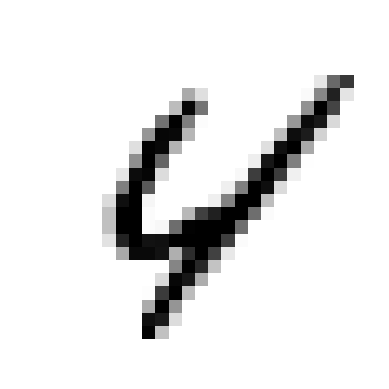

Label: 4


In [18]:
some_digit = X_train[1]  # Pick any index you want
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary', interpolation="nearest")
plt.axis("off")
plt.show()

print("Label:", y_train[1])

#### **Training a binary classifier**

let’s pick a classifier and train it. A good place to start is with a Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This clas‐
sifier has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later.

#### **5. Create a target for binary classifier.**

In [19]:
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

#### **6. Train a Stochastic Gradient Descent (SGD) classifier.**

In [20]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

#### **7. Make prediction on a test image.**

In [21]:
print("Prediction for first test sample:", sgd_clf.predict([X_test[1]]))
print("Actual label:", y_test[1])

Prediction for first test sample: [ True]
Actual label: 4
